In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [12]:
conn = sqlite3.connect('output/ao3.db')
querry = '''
SELECT DISTINCT authors.author_id, authors.author
FROM authors
JOIN fanfic
ON authors.author_id = fanfic.author_id
JOIN collections
ON fanfic.fanfic_id = collections.fanfic_id
WHERE collections.collection_name IN ('Lockwood Chaos Discord Fics','Chaos Discord Monthly Prompts')
'''
df = pd.read_sql(querry, conn)
conn.close()
df.to_csv('output/chaos_discord_authors.csv', index=False)

In [16]:
conn = sqlite3.connect('output/ao3.db')
querry = "SELECT * FROM fanfic"
fanfic = pd.read_sql(querry, conn)
conn.close()
fanfic

,fanfic_id,link,title,published,language,summary,warning,author_id
0,44791411,https://archiveofourown.org/works/44791411,Easily done,2023-02-04,English,"""We are containing the source,"" Lockwood told ...",No Archive Warnings Apply,2440594
1,47484628,https://archiveofourown.org/works/47484628,I will trust you,2023-05-28,English,Lucy and Lockwood running errands and enjoying...,No Archive Warnings Apply,15260589
2,45235999,https://archiveofourown.org/works/45235999,she feels like home,2023-02-22,English,"after waking from a nightmare, Lockwood locks ...",No Archive Warnings Apply,8699371
3,45056584,https://archiveofourown.org/works/45056584,Why So Sad?,2023-02-15,English,“We haven’t seen him since the Thomas case.”“I...,No Archive Warnings Apply,3796812
4,47517634,https://archiveofourown.org/works/47517634,It’s a No-Chance Showmance (I Don’t Mix Work W...,2023-05-29,English,"When Kat, who play Audrey in their school’s pr...",Creator Chose Not To Use Archive Warnings,13583521
...,...,...,...,...,...,...,...,...
2315,48597004,https://archiveofourown.org/works/48597004,Home Isn't The Same Without You,2023-07-15,English,A little snippet of how Lockwood handled Lucy'...,Creator Chose Not To Use Archive Warnings,15196848
2316,48648919,https://archiveofourown.org/works/48648919,The Double Phantoms,2023-07-17,English,Lockwood and Co. has always been a quaint litt...,Creator Chose Not To Use Archive Warnings,15196848
2317,48787459,https://archiveofourown.org/works/48787459,Agents (of a different sort),2023-07-23,English,"""What do we do now?""""I...don't know what you'r...",Creator Chose Not To Use Archive Warnings,14646558
2318,48772288,https://archiveofourown.org/works/48772288,Turns out her heart fits right in the palm of ...,2023-07-22,English,"To distract herself, she settled for watching ...",Creator Chose Not To Use Archive Warnings,8186197


In [17]:
len(set(fanfic['author_id']))

717

In [28]:
chaos_authors = pd.read_csv('output/chaos_discord_authors.csv')
chaos_authors['author_id'] = chaos_authors['author_id'].astype(str)
chaos_authors

,author_id,author,Unnamed: 2
0,7800,blithers,x
1,29836,Silverheart,x
2,45152,Marie,x
3,54958,hobbitsdoitbetter,x
4,75835,CryptidKatie,x
...,...,...,...
109,17543599,WhimysInkRibbons,x
110,17566711,synestheticwanderings,x
111,17785960,justice_for_skull (hyper_fix),x
112,18090943,Savoirfaire,x


In [25]:
chaos_fic = fanfic[fanfic['author_id'].isin(chaos_authors['author_id'])]
chaos_fic

,fanfic_id,link,title,published,language,summary,warning,author_id
0,44791411,https://archiveofourown.org/works/44791411,Easily done,2023-02-04,English,"""We are containing the source,"" Lockwood told ...",No Archive Warnings Apply,2440594
3,45056584,https://archiveofourown.org/works/45056584,Why So Sad?,2023-02-15,English,“We haven’t seen him since the Thomas case.”“I...,No Archive Warnings Apply,3796812
8,45264931,https://archiveofourown.org/works/45264931,That's The Living (All Messed Up),2023-02-23,English,Six times Lockwood checks Lucy’s injuries in a...,No Archive Warnings Apply,1316127
12,45893086,https://archiveofourown.org/works/45893086,just keep your eyes on me,2023-03-20,English,"“What are you doing?” She hissed, pulling her ...",No Archive Warnings Apply,3078813
13,45598954,https://archiveofourown.org/works/45598954,Harmony,2023-03-08,English,"5 times Lucy hears Lockwood sing, and 1 time s...",No Archive Warnings Apply,1765021
...,...,...,...,...,...,...,...,...
2308,48806170,https://archiveofourown.org/works/48806170,"Actually, it's Miss Lockwood",2023-07-23,English,The door opened with a loud noise of heavy woo...,Creator Chose Not To Use Archive WarningsNo Ar...,111393
2311,48632254,https://archiveofourown.org/works/48632254,Cookies v. Biscuits,2023-07-16,English,When Lockwood comes upon a group of American G...,No Archive Warnings Apply,4653566
2312,48755167,https://archiveofourown.org/works/48755167,Confession,2023-07-21,English,She reached forward and pulled the rosary from...,No Archive Warnings Apply,17785960
2318,48772288,https://archiveofourown.org/works/48772288,Turns out her heart fits right in the palm of ...,2023-07-22,English,"To distract herself, she settled for watching ...",Creator Chose Not To Use Archive Warnings,8186197


In [26]:
len(set(chaos_fic['author_id']))

113

In [32]:
conn = sqlite3.connect('output/ao3.db')
querry = "SELECT MAX(update_date), fanfic_id, words FROM updates GROUP BY fanfic_id ORDER BY words ASC"
updates = pd.read_sql(querry, conn)
conn.close()
updates

,MAX(update_date),fanfic_id,words
0,2023-02-01,44718403,None
1,2023-02-15,45070252,None
2,2023-02-15,45082042,None
3,2023-02-16,45103351,None
4,2023-02-19,45167602,None
...,...,...,...
2342,4/18/2023,46592665,988
2343,2022-11-19,43150861,989
2344,3/18/2020,23202952,993
2345,2023-06-12 00:00:00,47837278,996


16% of all lockwood and co fanfic writers are/were a part of the chaos discord
35% of all lockwood and co fanfic were writen by member/former members of the chaos discord

# Overview

How many Lockwood adn Co fanfics are being made through time?

In [2]:
conn = sqlite3.connect('output/ao3.db')
querry = "SELECT * FROM fanfic"
fanfic = pd.read_sql(querry, conn)
conn.close()

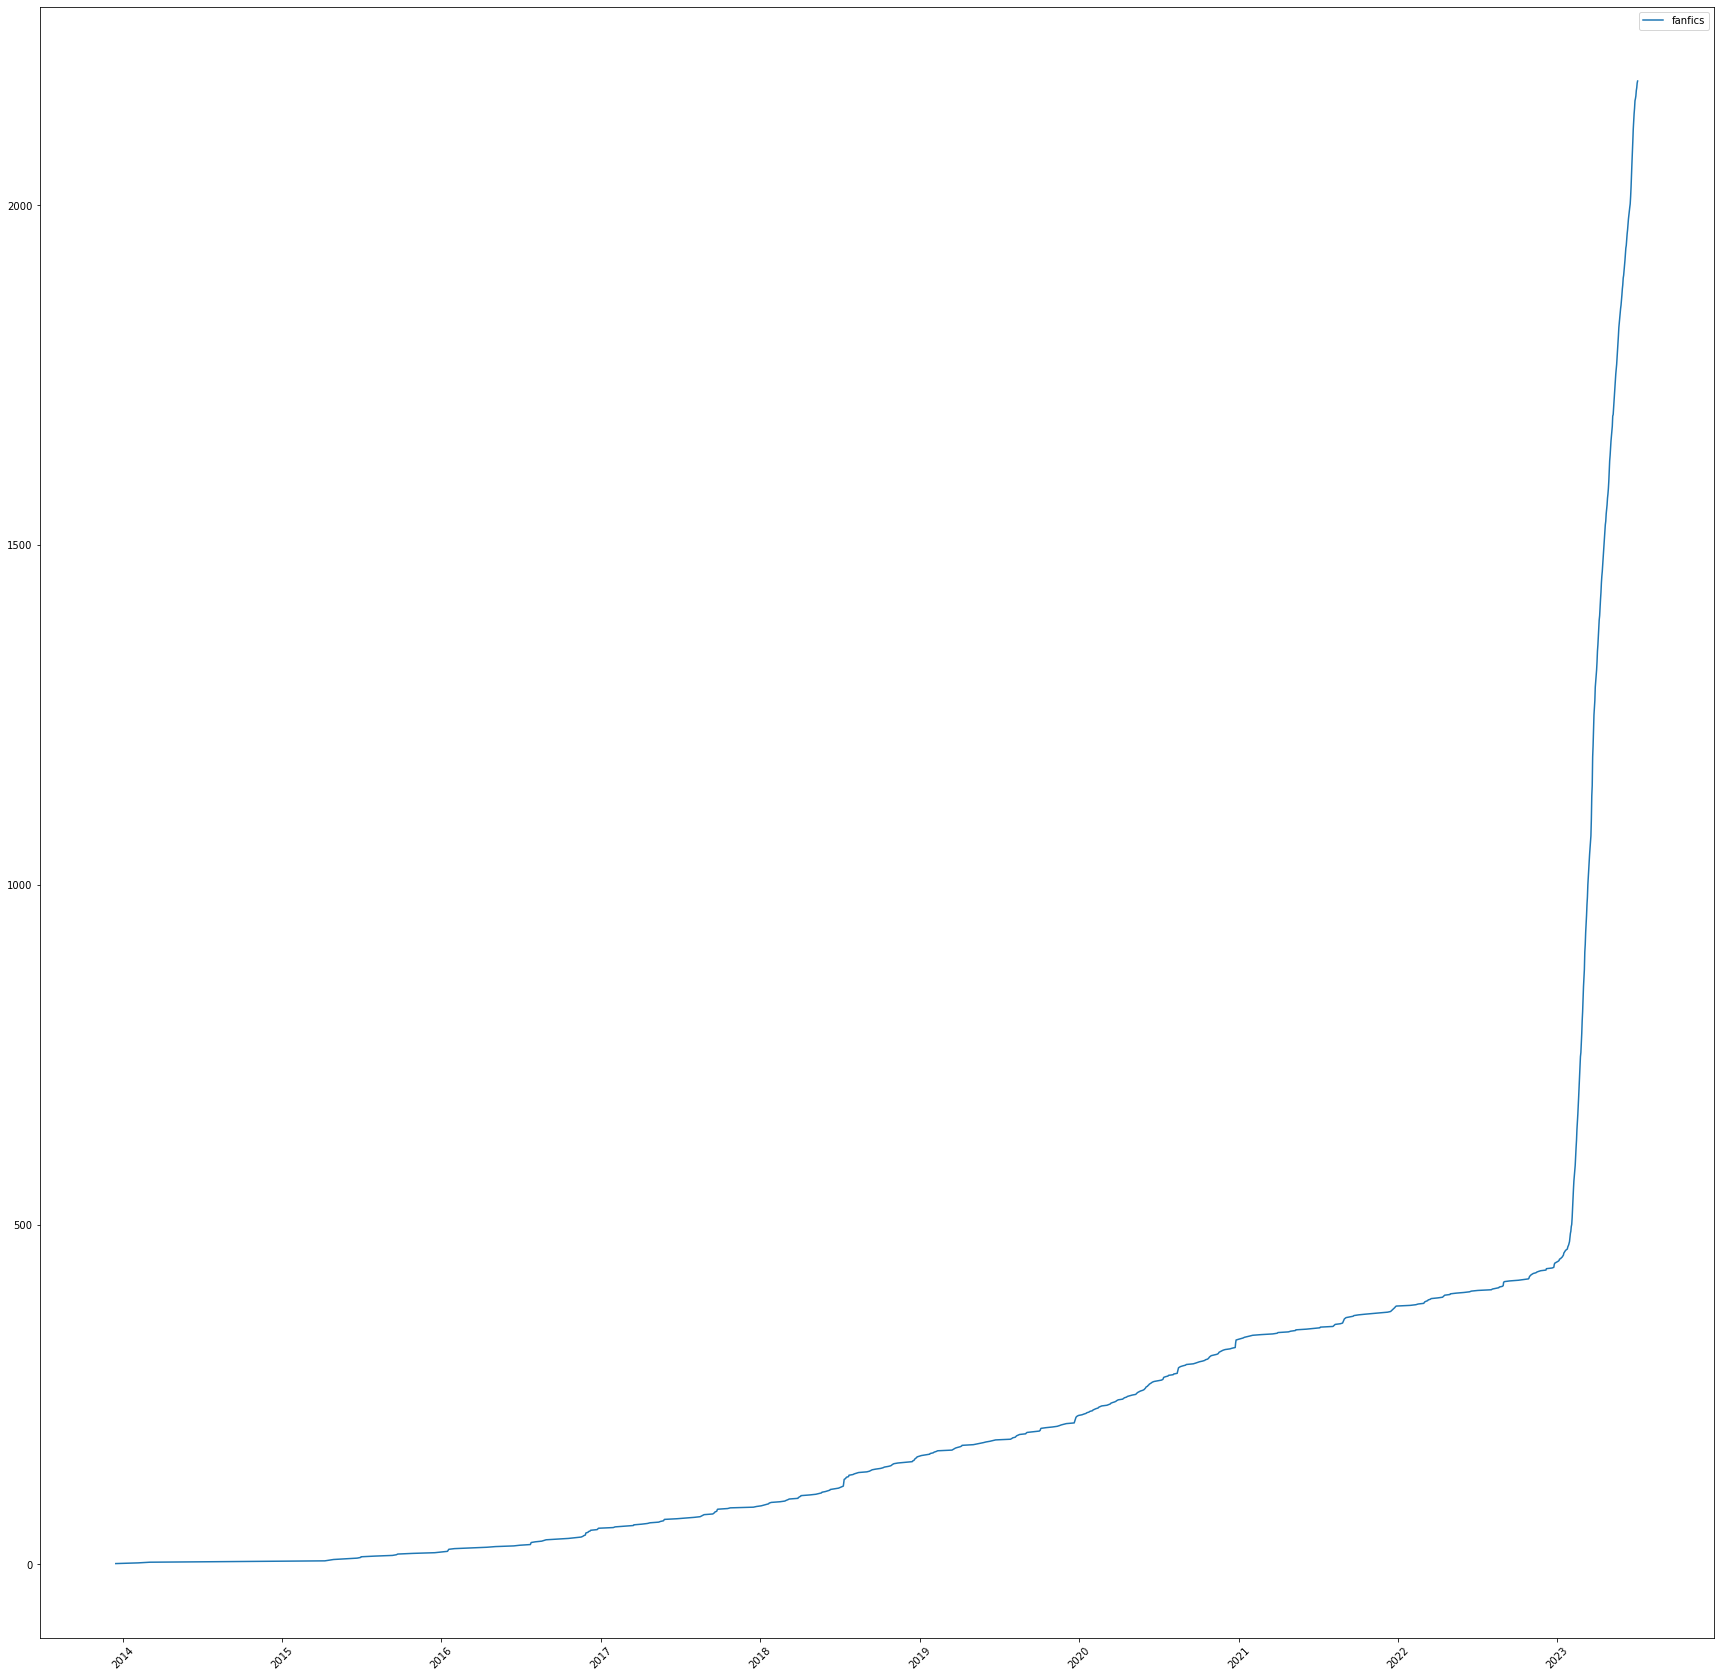

In [10]:
fanfic_grouped = fanfic.groupby('published')['fanfic_id'].count()
fanfic_grouped = fanfic_grouped.reset_index()
fanfic_grouped['published'] = pd.to_datetime(fanfic_grouped['published'])
fanfic_grouped = fanfic_grouped.sort_values(by='published')
fanfic_grouped = fanfic_grouped.reset_index(drop=True)
fanfic_grouped['fanfic_id'] = fanfic_grouped['fanfic_id'].cumsum()
plt.figure(figsize=(30, 30))
plt.plot(fanfic_grouped['published'], fanfic_grouped['fanfic_id'], label='fanfics')
plt.legend()
plt.xticks(rotation=45)
plt.show()

How many Lockwood and Co authors throught time?

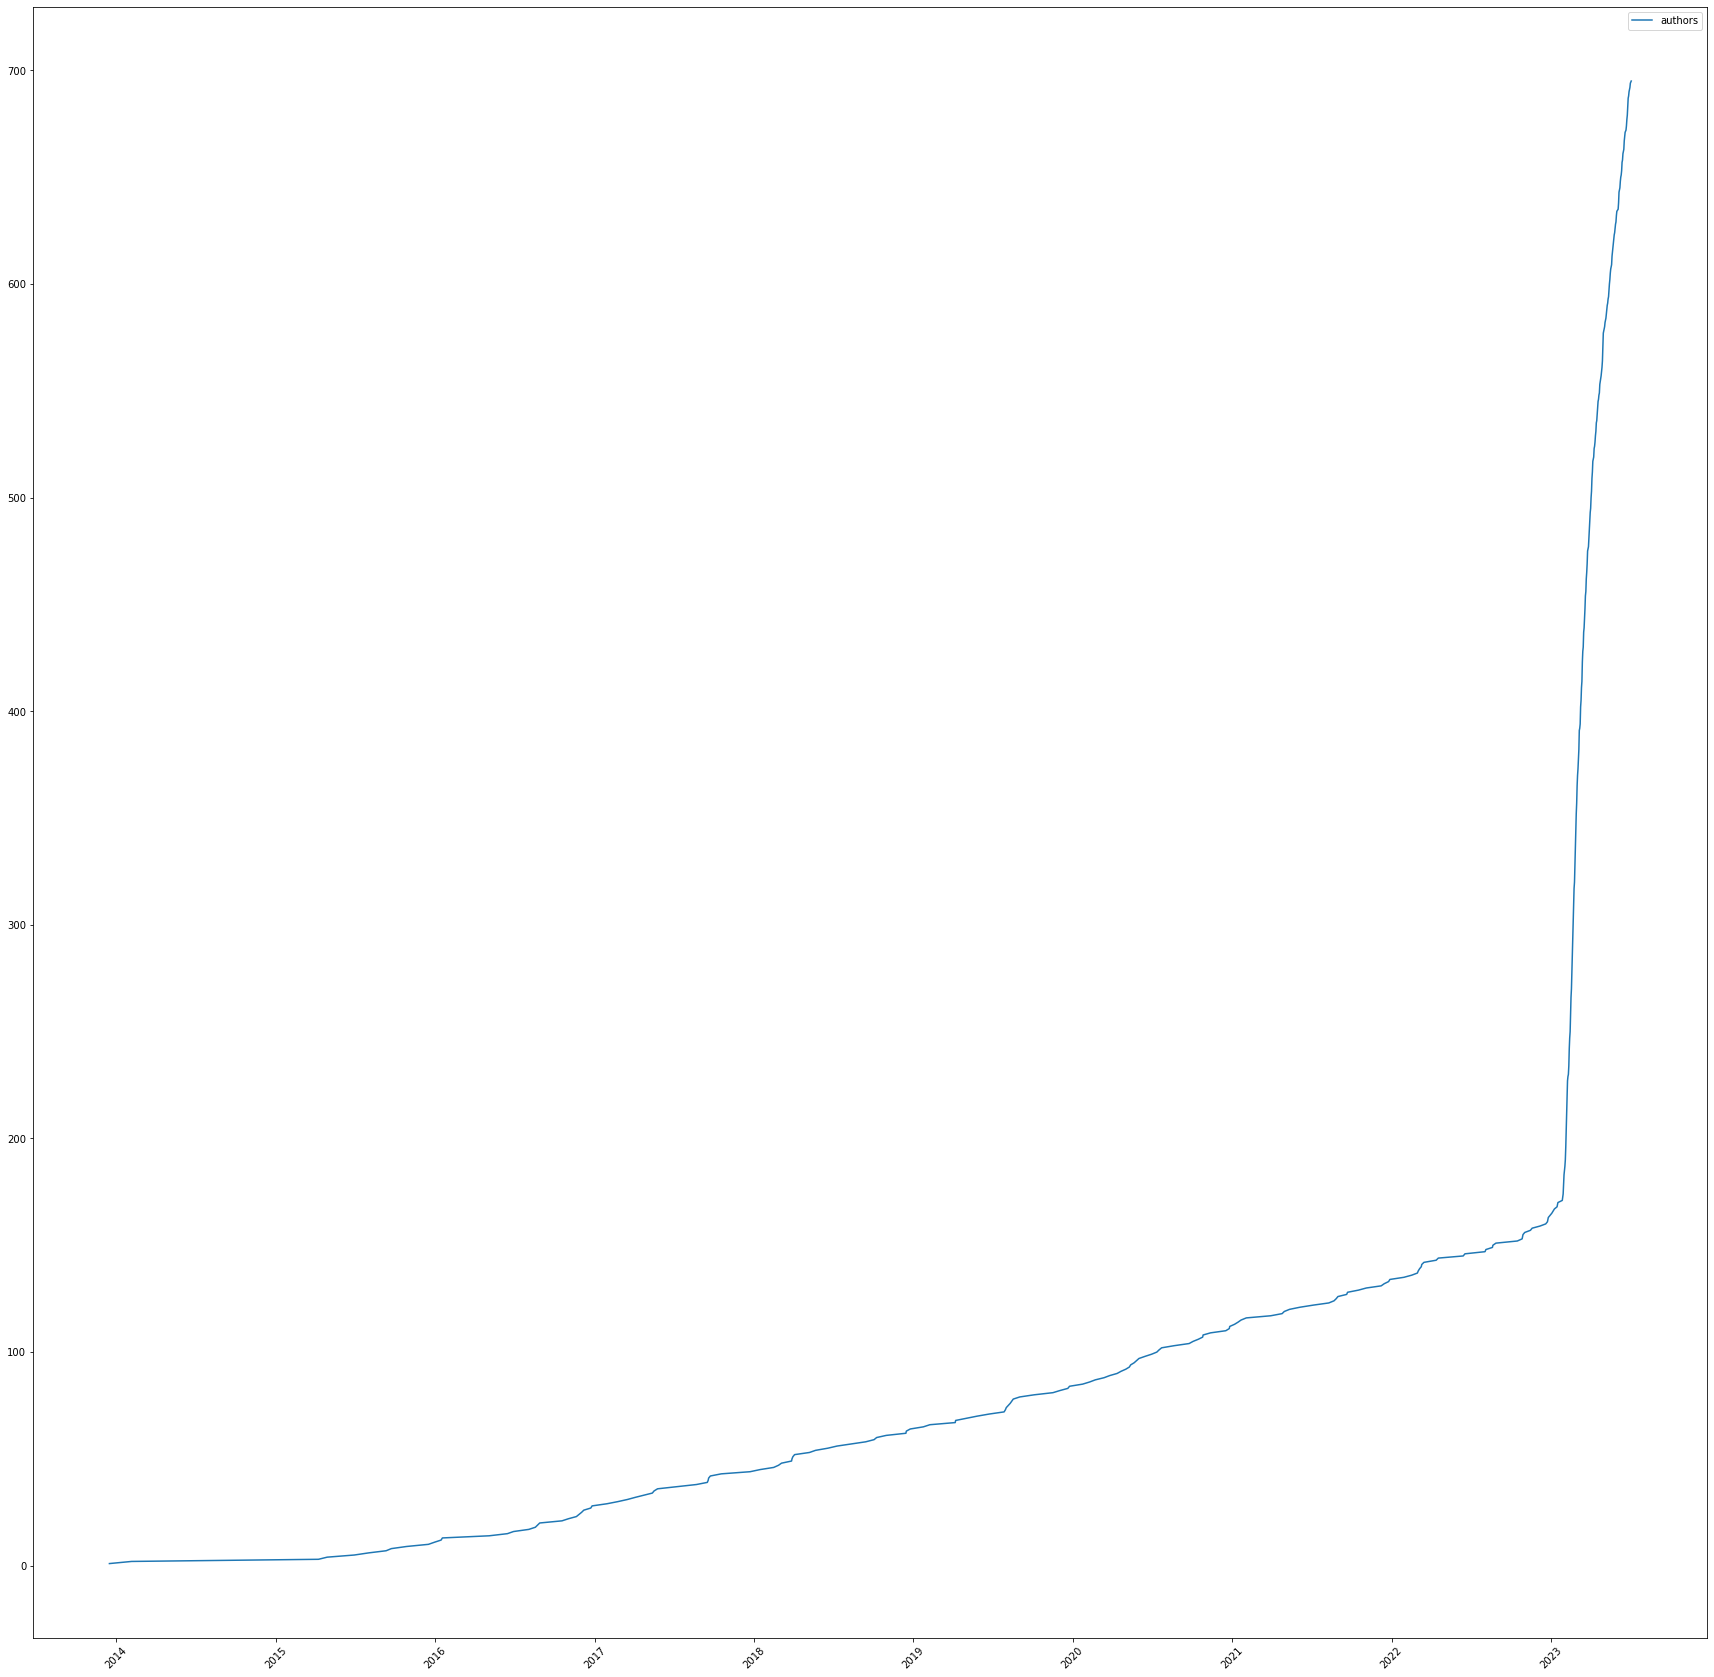

In [16]:
fanfic['published'] = pd.to_datetime(fanfic['published'])
fanfic_author = fanfic.groupby('author_id')['published'].min()
fanfic_author = fanfic_author.reset_index()
fanfic_author = fanfic_author.groupby('published')['author_id'].count()
fanfic_author = fanfic_author.reset_index()
fanfic_author = fanfic_author.sort_values(by='published')
fanfic_author = fanfic_author.reset_index(drop=True)
fanfic_author['author_id'] = fanfic_author['author_id'].cumsum()
plt.figure(figsize=(30, 30))
plt.plot(fanfic_author['published'], fanfic_author['author_id'], label='authors')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Pre-Lockwood and Co show

In [17]:
conn = sqlite3.connect('output/ao3.db')
querry = '''
    SELECT * 
    FROM fanfic
    WHERE published < '2023-01-27'
'''
fanfic_prelnc = pd.read_sql(querry, conn)
conn.close()
fanfic_prelnc

,fanfic_id,link,title,published,language,summary,warning,author_id
0,36028369,https://archiveofourown.org/works/36028369,My notes app,2021-12-28,English,Literally just things from my notes idk how to...,Creator Chose Not To Use Archive Warnings,7156873
1,44525851,https://archiveofourown.org/works/44525851,Just a Touch,2023-01-25,English,Lucy acts without knowing all the facts again....,Major Character Death,5036057
2,44525836,https://archiveofourown.org/works/44525836,Toss All Your Thoughts To The Sea,2023-01-25,English,"They walked into the circle.“No,” George shout...",Creator Chose Not To Use Archive Warnings,5036057
3,44524861,https://archiveofourown.org/works/44524861,The Great Shipwreck of Life,2023-01-25,English,"According to Murphy's Law, anything that can g...",Graphic Depictions Of Violence,5036057
4,44523286,https://archiveofourown.org/works/44523286,Lockwood & Co.: Case Files,2023-01-24,English,"All those cases you were left wondering about,...",Graphic Depictions Of Violence,1790218
...,...,...,...,...,...,...,...,...
462,3709479,https://archiveofourown.org/works/3709479,That Green Gentleman (Things Have Changed),2015-04-09,English,I got the idea from P!atd's song of the same n...,Creator Chose Not To Use Archive Warnings,1082199
463,2282274,https://archiveofourown.org/works/2282274,Ex Malo Bonum,2014-09-09,English,New department of DEPRAC offers up a job board...,No Archive Warnings Apply,76394
464,1267453,https://archiveofourown.org/works/1267453,and the world was gone,2014-03-04,English,Childhood is an odd thing. \tIt is filled with...,No Archive Warnings ApplyMajor Character Death,76394
465,1169828,https://archiveofourown.org/works/1169828,The Passage of Time,2014-02-05,English,"I waited for him to try again, to dissuade me ...",No Archive Warnings Apply,76394
